In [1]:
import pandas as pd
import numpy as np
import copy

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

In [2]:
maze = gym.make('Woods1-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'list'>
['.', '.', '.', '.', '.', '.', '.', 'O']

□ □ □ X □
□ □ □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import *
from utils.nxcs_utils import *

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg_no_mods = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = False,
                    cover_env_input = False,)

XNCScfg_update = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = True,
                    cover_env_input = False,)

XNCScfg_cover = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = False,
                    cover_env_input = True,)

XNCScfg_both = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = True,
                    cover_env_input = True,)

In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 10
explore = 1000
exploit = 1000
print("Starting XCS")
df = XCSExp(
    maze=maze,
    cfg=XCScfg,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
           )
print("Starting XNCS")
df_no_mods = XNCSExp(
    maze=maze,
    cfg=XNCScfg_no_mods,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
    )
print("Starting XNCS with enviromental input during cover")
df_cover = XNCSExp(
    maze=maze,
    cfg=XNCScfg_cover,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
    )
print("Starting XNCS with enviromental input during update")
df_update = XNCSExp(
    maze=maze,
    cfg=XNCScfg_update,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
    )
print("Starting XNCS with all enviromental inputs")
df_both = XNCSExp(
    maze=maze,
    cfg=XNCScfg_both,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False

)

Starting XCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during cover
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during update
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experim

In [5]:
df_all = pd.DataFrame(df)

df_all['steps_in_trial_no_mods']=df_no_mods['steps_in_trial']
df_all['steps_in_trial_update'] =df_update['steps_in_trial']
df_all['steps_in_trial_cover']  =df_cover['steps_in_trial']
df_all['steps_in_trial_both']   =df_both['steps_in_trial']

df_all['population_no_mods']=df_no_mods['population']
df_all['population_update'] =df_update['population']
df_all['population_cover']  =df_cover['population']
df_all['population_both']   =df_both['population']

df_all['average_specificity_no_mods']=df_no_mods['average_specificity']
df_all['average_specificity_update']=df_update['average_specificity']
df_all['average_specificity_cover']=df_cover['average_specificity']
df_all['average_specificity_both']=df_both['average_specificity']

df_all['fraction_accuracy_no_mods']=df_no_mods['fraction_accuracy']
df_all['fraction_accuracy_update']=df_update['fraction_accuracy']
df_all['fraction_accuracy_cover']=df_cover['fraction_accuracy']
df_all['fraction_accuracy_both']=df_both['fraction_accuracy']

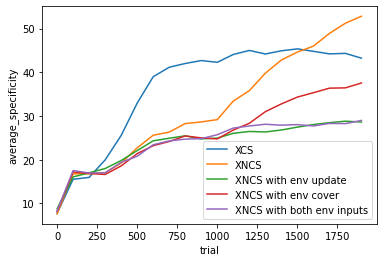

In [6]:
ax = df[['average_specificity',
         "average_specificity_no_mods",
         "average_specificity_update",
         "average_specificity_cover",
         "average_specificity_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

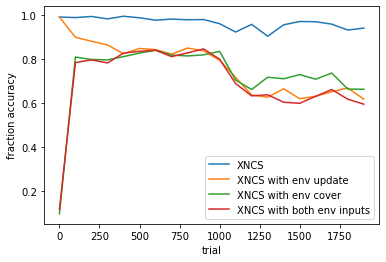

In [7]:
ax = df[["fraction_accuracy_no_mods",
         "fraction_accuracy_update",
         "fraction_accuracy_cover",
         "fraction_accuracy_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

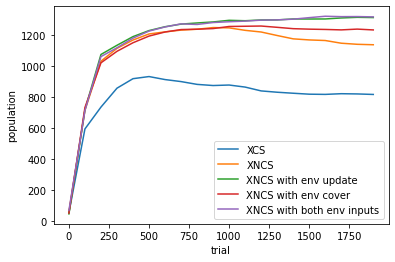

In [8]:
ax = df[['population',
         "population_no_mods",
         "population_update",
         "population_cover",
         "population_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

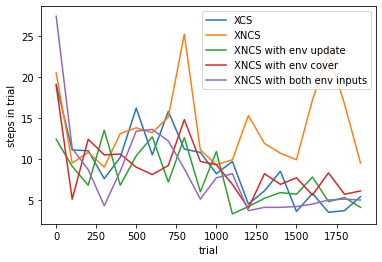

In [9]:
ax = df[['steps_in_trial',
         "steps_in_trial_no_mods",
         "steps_in_trial_update",
         "steps_in_trial_cover",
         "steps_in_trial_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

In [10]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_no_mods"])/number_of_experiments)
print(sum(df["steps_in_trial_update"])/number_of_experiments)
print(sum(df["steps_in_trial_cover"])/number_of_experiments)
print(sum(df["steps_in_trial_both"])/number_of_experiments)

18.249999999999996
27.47
15.470000000000002
17.709999999999997
16.489999999999995


In [11]:
display(df)
display(df_no_mods)
display(df_update)
display(df_cover)
display(df_both)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,steps_in_trial_no_mods,steps_in_trial_update,steps_in_trial_cover,steps_in_trial_both,...,population_cover,population_both,average_specificity_no_mods,average_specificity_update,average_specificity_cover,average_specificity_both,fraction_accuracy_no_mods,fraction_accuracy_update,fraction_accuracy_cover,fraction_accuracy_both
trial,,,,,,,,,,,,,,,,,,,,,
0,19.1,1000.000000,0.009435,56.2,56.9,7.735548,20.5,12.4,19.0,27.4,...,53.5,70.7,7.606516,8.755512,8.150237,8.237262,0.992515,0.992308,0.094839,0.115279
100,11.1,1301.414589,0.087160,596.1,1600.0,15.526375,9.5,9.1,5.1,11.3,...,734.3,714.5,16.777873,16.068753,17.213004,17.523287,0.990000,0.900000,0.810000,0.785000
200,11.0,1123.465230,0.097362,736.8,1600.0,15.965187,10.8,6.8,12.4,8.7,...,1022.1,1062.2,16.806250,17.005375,16.843875,16.966438,0.995000,0.882000,0.799000,0.797000
300,7.6,1201.184712,0.074454,858.7,1600.0,19.953500,9.0,13.5,10.5,4.3,...,1096.3,1119.2,17.013625,17.991688,16.629188,16.998188,0.984000,0.865000,0.797000,0.783000
400,10.2,1216.605330,0.118807,919.9,1600.0,25.550250,13.1,6.8,10.6,8.5,...,1151.5,1181.2,19.240125,19.817188,18.585563,19.408687,0.996000,0.825000,0.812000,0.828000
500,16.2,1178.278956,0.197529,933.6,1600.0,32.943188,13.8,10.4,9.0,13.4,...,1194.4,1226.7,22.719563,22.093750,21.396625,20.795437,0.989000,0.849000,0.828000,0.836000
600,10.5,1241.655991,0.098874,914.2,1600.0,38.988625,13.2,12.7,8.1,13.6,...,1220.7,1253.3,25.597875,24.326375,23.212938,23.428875,0.978000,0.844000,0.841000,0.841000
700,15.8,1108.009438,0.225334,901.2,1600.0,41.160063,15.1,7.2,9.2,12.2,...,1236.5,1273.2,26.324687,24.917125,24.173188,24.303125,0.983000,0.823000,0.819000,0.812000
800,11.2,1290.739758,0.128304,883.2,1600.0,42.012312,25.2,12.6,14.8,8.8,...,1238.8,1269.3,28.275750,25.471312,25.437000,24.714750,0.980000,0.851000,0.815000,0.829000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,20.5,900.000000,0.015873,63.2,60.9,7.606516,0.992515
100,9.5,1227.423987,0.078016,1213.6,716.4,16.777873,0.990000
200,10.8,1421.401580,0.166206,1600.0,1032.6,16.806250,0.995000
300,9.0,1199.453545,0.163911,1600.0,1115.3,17.013625,0.984000
400,13.1,1261.426106,0.243658,1600.0,1169.1,19.240125,0.996000
500,13.8,1122.521038,0.273922,1600.0,1208.1,22.719563,0.989000
600,13.2,1100.041260,0.266519,1600.0,1221.5,25.597875,0.978000
700,15.1,1213.301119,0.304208,1600.0,1232.9,26.324687,0.983000
800,25.2,777.720326,0.433987,1600.0,1238.5,28.275750,0.980000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,12.4,1000.000000,0.007646,48.4,48.4,8.755512,0.992308
100,9.1,1324.661978,0.069879,1216.8,720.2,16.068753,0.900000
200,6.8,1558.597326,0.102525,1600.0,1076.0,17.005375,0.882000
300,13.5,1195.968338,0.267367,1600.0,1135.1,17.991688,0.865000
400,6.8,1363.705578,0.118301,1600.0,1191.0,19.817188,0.825000
500,10.4,1204.884402,0.250377,1600.0,1229.9,22.093750,0.849000
600,12.7,1285.448742,0.247564,1600.0,1254.7,24.326375,0.844000
700,7.2,1309.232862,0.141729,1600.0,1271.6,24.917125,0.823000
800,12.6,1249.459743,0.276387,1600.0,1279.0,25.471312,0.851000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,19.0,1000.000000,0.009044,54.2,53.5,8.150237,0.094839
100,5.1,1458.221347,0.030004,1265.9,734.3,17.213004,0.810000
200,12.4,1164.970553,0.153219,1600.0,1022.1,16.843875,0.799000
300,10.5,1202.146656,0.133908,1600.0,1096.3,16.629188,0.797000
400,10.6,1326.370793,0.137508,1600.0,1151.5,18.585563,0.812000
500,9.0,1260.933829,0.128201,1600.0,1194.4,21.396625,0.828000
600,8.1,1456.110729,0.114719,1600.0,1220.7,23.212938,0.841000
700,9.2,1244.340769,0.137950,1600.0,1236.5,24.173188,0.819000
800,14.8,1247.902166,0.201304,1600.0,1238.8,25.437000,0.815000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,27.4,800.000000,0.020166,73.1,70.7,8.237262,0.115279
100,11.3,1138.264495,0.106833,1210.2,714.5,17.523287,0.785000
200,8.7,1284.205520,0.145641,1600.0,1062.2,16.966438,0.797000
300,4.3,1373.006410,0.079344,1600.0,1119.2,16.998188,0.783000
400,8.5,1270.097351,0.155063,1600.0,1181.2,19.408687,0.828000
500,13.4,1077.686409,0.246428,1600.0,1226.7,20.795437,0.836000
600,13.6,1249.219204,0.348517,1600.0,1253.3,23.428875,0.841000
700,12.2,1341.153410,0.254647,1600.0,1273.2,24.303125,0.812000
800,8.8,1253.539500,0.190762,1600.0,1269.3,24.714750,0.829000
